# Caso 1. Regresión lineal simple Estatura PesoKgs de jugadores FIFA en Python

## Date: 14/09

## Autor:

    EZEQUIEL OLIVAS MELENDEZ

# Objetivo

Realizar predicciones de peso de jugadores de fútbol con los datos de FIFA de acuerdo a la variable estatura a partir de un modelo de regresión lineal simple.

# Descripción

- Cargar librerías

- Cargar datos

- Seleccionar variables de estudio estatura y peso

- Crear datos de entrenamiento y datos de validación

- Construir el modelo de regresión lineal simple

- Evaluar el modelo

- Realizar predicciones con los datos validación

- Realizar predicciones con datos nuevos

- Interpretación del caso


# Desarrollo

## Cargar librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
#%matplotlib inline

## Cargar datos

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.limpios.csv", encoding='latin1')

## Explorar datos

In [3]:
datos[['Estatura', 'PesoKgs']].describe()

,Estatura,PesoKgs
count,17907.000000,17907.000000
mean,1.812325,75.279478
std,0.067671,7.077378
min,1.550000,49.900000
25%,1.750000,69.850000
50%,1.800000,74.840000
75%,1.850000,79.830000
max,2.060000,110.220000


## Verificar si hay datos nulos

In [4]:
print(datos['Estatura'].isnull().sum().sum())
print(datos['PesoKgs'].isnull().sum().sum())

0
0


## Partir datos en datos de entrenamiento y datos de validación


Las variables de interés serán Estaura y PesoKgs de los datos de entrenamiento.

De las dos variables de interés, Estatura y PesoKgs se determina que la variable predictora es Estatura y el PesoKgs es la variable de respuesta o también:

Estatura es variable independiente y

PesoKgs es variable dependiente

Es decir, la variable PesoKgs depende de la Estatura Con la función loc[:'atributo'] se eligen las variables de interés del conjunto de datos

In [5]:
estatura = datos[['Estatura']].to_numpy()
pesokgs = datos[['PesoKgs']].to_numpy()

In [9]:
estatura_train, estatura_test, pesokgs_train, pesokgs_test = train_test_split(estatura, pesokgs, test_size=0.3, random_state=2022)
estatura_train

array([[1.85],
       [1.93],
       [1.85],
       ...,
       [1.83],
       [1.75],
       [1.78]])

In [10]:
modelo = LinearRegression()
modelo.fit(estatura_train, pesokgs_train)

LinearRegression()

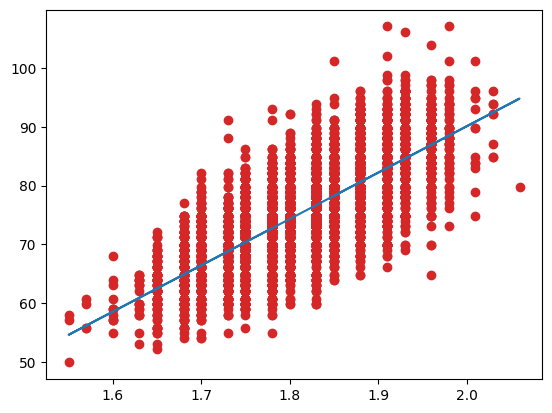

In [14]:
linea_tendencia = modelo.predict(estatura_train)
plt.plot(estatura_train, pesokgs_train, 'o', color= '#d62728')
plt.plot(estatura_train, linea_tendencia, color="#1f77b4")

## Coeficientes

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>Y</mi>
  <mo>=</mo>
  <mi>a</mi>
  <mo>+</mo>
  <mi>b</mi>
  <mi>x</mi>
</math>

In [15]:

a = modelo.intercept_
b = modelo.coef_

print("Valor de a: ", a)
print("Valor de b; ", b)

Valor de a:  [-67.50986539]
Valor de b;  [[78.78539487]]


In [16]:
predicciones = modelo.predict(estatura_test)
predicciones

array([[72.72813748],
       [72.72813748],
       [70.36457563],
       ...,
       [80.60667697],
       [80.60667697],
       [72.72813748]])

In [17]:
pesokgs_test

array([[66.22],
       [77.11],
       [73.03],
       ...,
       [83.01],
       [79.83],
       [67.13]])

In [19]:
diccionario = {
    'Estatura': estatura_test.flatten().tolist(),
    'PesoKgs': pesokgs_test.flatten().tolist(),
    'Predicciones': predicciones.flatten().tolist()
}
comparaciones = pd.DataFrame(diccionario)
comparaciones.head(20)

,Estatura,PesoKgs,Predicciones
0,1.78,66.22,72.728137
1,1.78,77.11,72.728137
2,1.75,73.03,70.364576
3,1.91,88.00,82.970239
4,1.88,73.03,80.606677
5,1.78,74.84,72.728137
6,1.83,74.84,76.667407
7,1.75,71.21,70.364576
8,1.73,71.21,68.788868
9,1.78,78.02,72.728137


In [20]:
comparaciones.tail(20)

,Estatura,PesoKgs,Predicciones
5353,1.93,79.83,84.545947
5354,1.93,86.18,84.545947
5355,1.85,78.02,78.243115
5356,1.75,73.94,70.364576
5357,1.91,79.83,82.970239
5358,1.83,78.93,76.667407
5359,1.78,72.12,72.728137
5360,1.91,82.10,82.970239
5361,1.93,91.17,84.545947
5362,1.78,78.02,72.728137


## Evaluando el modelo

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>M</mi>
  <mi>A</mi>
  <mi>E</mi>
  <mo>=</mo>
  <mi>P</mi>
  <mi>e</mi>
  <mi>n</mi>
  <mi>d</mi>
  <mi>i</mi>
  <mi>e</mi>
  <mi>n</mi>
  <mi>t</mi>
  <mi>e</mi>
  <mo>.</mo>
  <mo>.</mo>
  <mo>.</mo>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>M</mi>
  <mi>S</mi>
  <mi>E</mi>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mo data-mjx-texclass="OP">&#x2211;</mo>
      <mo stretchy="false">(</mo>
      <mi>p</mi>
      <mi>r</mi>
      <mi>e</mi>
      <mi>d</mi>
      <mi>i</mi>
      <mi>c</mi>
      <mi>h</mi>
      <msub>
        <mi>o</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2212;</mo>
      <mi>r</mi>
      <mi>e</mi>
      <mi>a</mi>
      <msub>
        <mi>l</mi>
        <mi>i</mi>
      </msub>
      <msup>
        <mo stretchy="false">)</mo>
        <mrow data-mjx-texclass="ORD">
          <mn>2</mn>
        </mrow>
      </msup>
    </mrow>
    <mi>n</mi>
  </mfrac>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>R</mi>
  <mi>M</mi>
  <mi>S</mi>
  <mi>E</mi>
  <mo>=</mo>
  <msqrt>
    <mfrac>
      <mrow>
        <mo data-mjx-texclass="OP">&#x2211;</mo>
        <mo stretchy="false">(</mo>
        <mi>p</mi>
        <mi>r</mi>
        <mi>e</mi>
        <mi>d</mi>
        <mi>i</mi>
        <mi>c</mi>
        <mi>h</mi>
        <msub>
          <mi>o</mi>
          <mi>i</mi>
        </msub>
        <mo>&#x2212;</mo>
        <mi>r</mi>
        <mi>e</mi>
        <mi>a</mi>
        <msub>
          <mi>l</mi>
          <mi>i</mi>
        </msub>
        <msup>
          <mo stretchy="false">)</mo>
          <mrow data-mjx-texclass="ORD">
            <mn>2</mn>
          </mrow>
        </msup>
      </mrow>
      <mi>n</mi>
    </mfrac>
  </msqrt>
</math>

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Multipel R Squared&#xA0;</mtext>
  <mo>=</mo>
  <msup>
    <mi>R</mi>
    <mn>2</mn>
  </msup>
  <mo>=</mo>
  <mi>c</mi>
  <mi>o</mi>
  <mi>r</mi>
  <mo stretchy="false">(</mo>
  <mi>x</mi>
  <mo>,</mo>
  <mi>y</mi>
  <msup>
    <mo stretchy="false">)</mo>
    <mn>2</mn>
  </msup>
  <mtext>; de Pearson</mtext>
</math>

In [21]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(pesokgs_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(pesokgs_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pesokgs_test, predicciones)))

r = np.corrcoef(estatura_train.flatten().tolist(), pesokgs_train.flatten().tolist())
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('Multiple R Square :', np.round(r, 4) )

Mean Absolute Error: MAE 3.632652042179118
Mean Squared Error: MSE 21.813749730525863
Root Mean Squared Error RMSE: 4.670519214233666
Multiple R Square : 0.5681


## Interpretación

De este trabajo podemos observar como la regresión lineal simple es una herramienta muy útil para tratar de predecir el comportamiento de una variable dependiente en función de una variable independiente. En este caso, la variable independiente es la estatura y la variable dependiente es el peso. El modelo de regresión lineal simple nos permitió obtener una ecuación que nos permite predecir el peso de una persona a partir de su estatura. En este caso, el modelo de regresión lineal simple nos permitió obtener una ecuación que nos permite predecir el peso de una persona a partir de su estatura. En este caso, el modelo de regresión lineal simple nos permitió obtener una ecuación que nos permite predecir el peso de una persona a partir de su estatura.